In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import cv2
import time
from skimage import morphology
import seaborn as sns
import scipy.ndimage as ndimage
from nd2reader import ND2Reader
import itertools
plt.rcParams['figure.figsize'] = (20,12)
%config InlineBackend.figure_format = 'retina'


In [4]:
def remove_small(image):
    labels_bi, nbr_objects_bi = ndimage.measurements.label(image)

    areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
    mask = areas > 20
    remove_small_gomi = mask[labels_bi]
    return remove_small_gomi.astype(int)

def fill_hole(image):
    
    if len(image.shape) == 2:
        return ndimage.binary_fill_holes(image).astype(int)
    
    else:
        return ndimage.binary_fill_holes(image[:,:,0]).astype(int)

In [9]:
def main(path):
    threshold_P = 50
    threshold_M = 175

    img = ND2Reader(path)
    PDZD8 = img.get_frame_2D(z=2, c=1)
    Mito = img.get_frame_2D(z=2, c=2)
    Cell =  img.get_frame_2D(z=2, c=0)
    # Making binary images
    ret_P ,th_P = cv2.threshold(PDZD8,threshold_P,65535,cv2.THRESH_BINARY)
    th_P = th_P/65535
    ret_M , th_M = cv2.threshold(Mito,threshold_M,65535,cv2.THRESH_BINARY)
    th_M = th_M/65535
    th_M= remove_small(th_M)
    #th_M= fill_hole(th_M)


    #ret_L ,th_L = cv2.threshold(Lyso,threshold_L,65535,cv2.THRESH_BINARY)
    #th_L = th_L/65535

    PDZD8 = (PDZD8 - threshold_P)*th_P
    Mito = (Mito-threshold_M)*th_M

    # Converting to 8bit image
    th_P = (th_P).astype('uint8')
    th_M = (th_M).astype('uint8')

    PDZD8_on_Mito = np.sum(PDZD8*th_M)/np.sum(PDZD8) 
    
    return PDZD8_on_Mito

In [10]:
df = pd.DataFrame(data=None, index=None, columns= ["PDZD8_on_mito_ratio"], dtype=None, copy=False)

for i in range(1,18):
    if i != False:  #8は分裂中ぽかったので除去
        print(i)
        file_name = r"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_" + str(i).zfill(2) + " - Deconvolved, Type Automatic.nd2.nd2"
        df.loc[file_name] = main(file_name)

1
2
3
4
5


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

6
7
8
9
10
11


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

12
13
14
15
16
17


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

In [11]:
df

,PDZD8_on_mito_ratio
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_01 - Deconvolved, Type Automatic.nd2.nd2",0.212741
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_02 - Deconvolved, Type Automatic.nd2.nd2",0.309055
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_03 - Deconvolved, Type Automatic.nd2.nd2",0.221081
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_04 - Deconvolved, Type Automatic.nd2.nd2",0.212012
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_05 - Deconvolved, Type Automatic.nd2.nd2",0.208849
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_06 - Deconvolved, Type Automatic.nd2.nd2",0.230727
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_07 - Deconvolved, Type Automatic.nd2.nd2",0.298511
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_08 - Deconvolved, Type Automatic.nd2.nd2",0.142123
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_09 - Deconvolved, Type Automatic.nd2.nd2",0.236634
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_10 - Deconvolved, Type Automatic.nd2.nd2",0.165886


In [14]:
df_1 = pd.DataFrame(data=None, index=None, columns= ["PDZD8_on_mito_ratio"], dtype=None, copy=False)

for i in range(1,15):
    
    if not i in []:
        print(i)
        file_name = r"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_" + str(i).zfill(2) + " - Deconvolved, Type Automatic.nd2.nd2"
        df_1.loc[file_name] = main(file_name)

1
2
3
4
5
6


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

7
8
9
10
11
12


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

13
14


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12525/3367620499.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

In [15]:
df_1 

,PDZD8_on_mito_ratio
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_01 - Deconvolved, Type Automatic.nd2.nd2",0.188775
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_02 - Deconvolved, Type Automatic.nd2.nd2",0.179063
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_03 - Deconvolved, Type Automatic.nd2.nd2",0.230865
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_04 - Deconvolved, Type Automatic.nd2.nd2",0.121007
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_05 - Deconvolved, Type Automatic.nd2.nd2",0.183218
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_06 - Deconvolved, Type Automatic.nd2.nd2",0.039270
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_07 - Deconvolved, Type Automatic.nd2.nd2",0.035273
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_08 - Deconvolved, Type Automatic.nd2.nd2",0.136524
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_09 - Deconvolved, Type Automatic.nd2.nd2",0.068599
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_4_KI_KO_10 - Deconvolved, Type Automatic.nd2.nd2",0.178725


In [16]:
df["condition"] = "Ctrl"
df_1["condition"] = "FKBP8_KO"

In [17]:
df1 = pd.concat([df, df_1])

In [20]:
df1

,PDZD8_on_mito_ratio,condition
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_01 - Deconvolved, Type Automatic.nd2.nd2",0.212741,Ctrl
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_02 - Deconvolved, Type Automatic.nd2.nd2",0.309055,Ctrl
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_03 - Deconvolved, Type Automatic.nd2.nd2",0.221081,Ctrl
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_04 - Deconvolved, Type Automatic.nd2.nd2",0.212012,Ctrl
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_05 - Deconvolved, Type Automatic.nd2.nd2",0.208849,Ctrl
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_06 - Deconvolved, Type Automatic.nd2.nd2",0.230727,Ctrl
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_07 - Deconvolved, Type Automatic.nd2.nd2",0.298511,Ctrl
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_08 - Deconvolved, Type Automatic.nd2.nd2",0.142123,Ctrl
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_09 - Deconvolved, Type Automatic.nd2.nd2",0.236634,Ctrl
"/Users/nakamurawataruki/Documents/Results/Exp497/NSPARC/Exp497_NSPARC/NIH3T3_KO/simple_deconv/KN497_240307_3_KI_Control_10 - Deconvolved, Type Automatic.nd2.nd2",0.165886,Ctrl


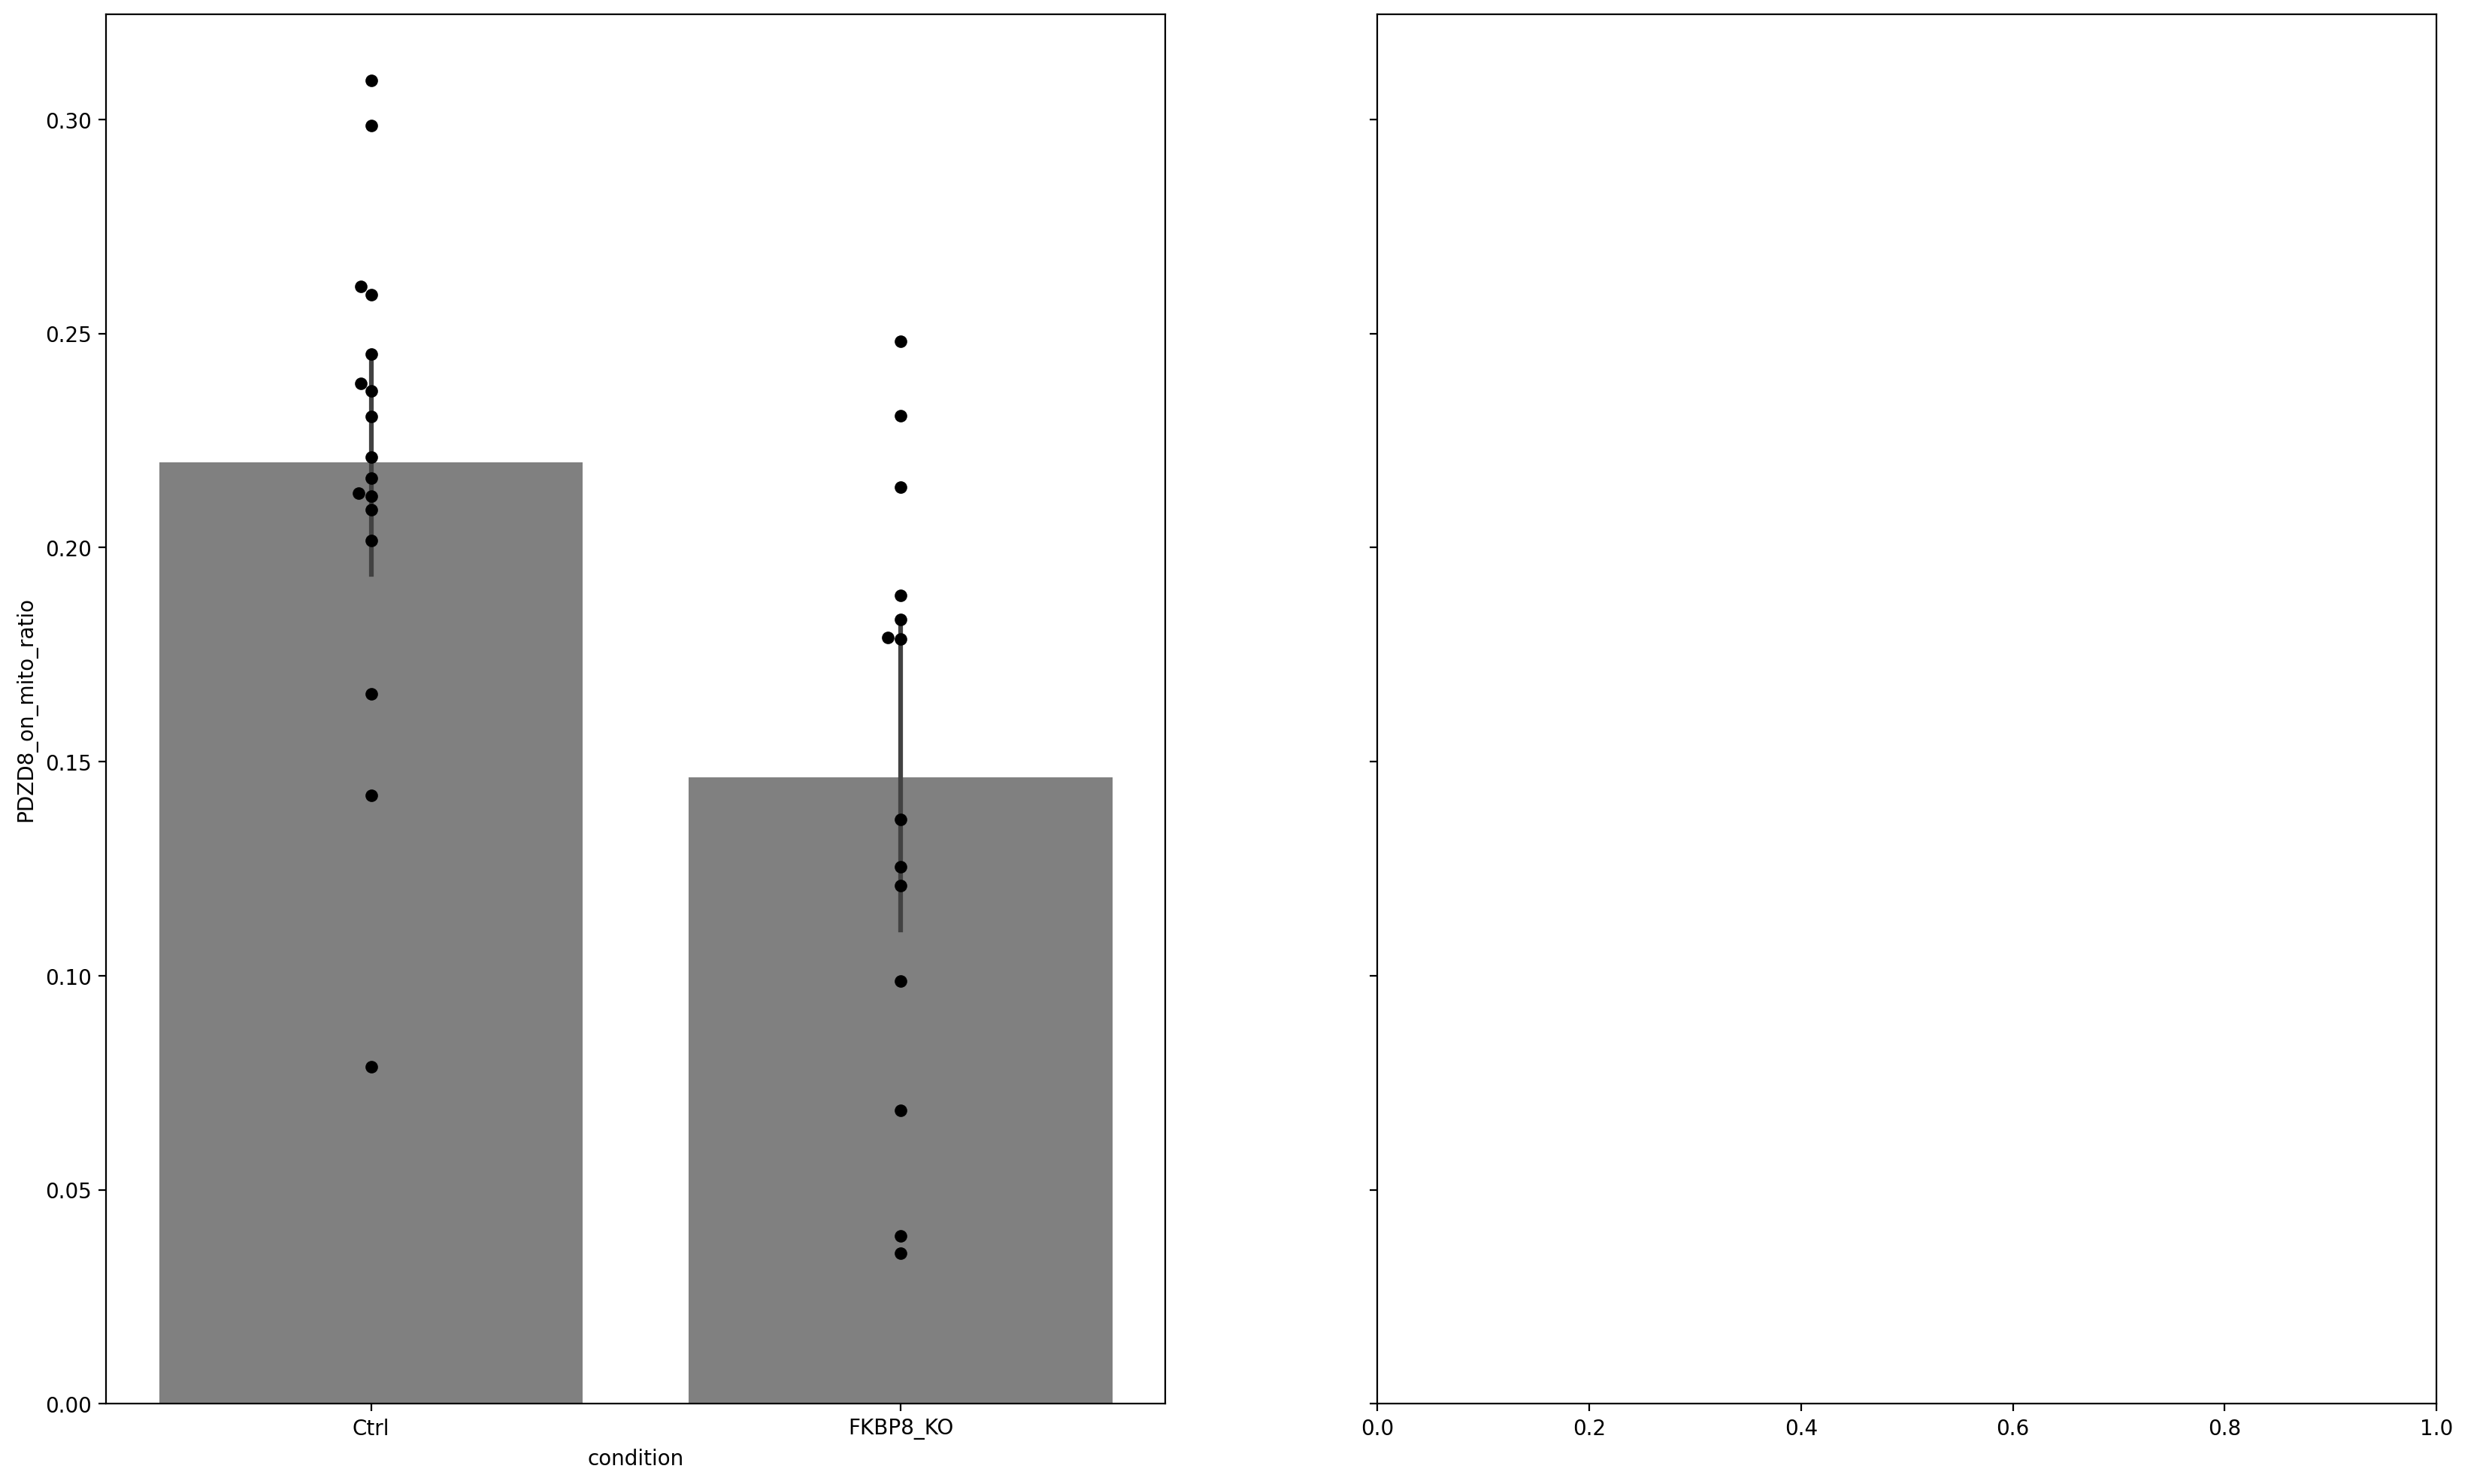

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for (Y, AX) in zip(["PDZD8_on_mito_ratio"], [ax1]):
    sns.barplot(data = df1, y = Y, x = "condition", color = "gray", ax=AX)
    sns.swarmplot(data = df1, color="black",y = Y, x = "condition", size = 6 ,ax = AX)